# K-Nearest Neighbors (KNN)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from knn import KNN

### Load the dataset

In [2]:
# Load the "diabetes.csv" dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Dataset Analysis

In [3]:
# check whether there are missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
# check the type of each feature (categorical or numerical)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.848761,120.930900,69.104302,20.522816,79.903520,31.994654,0.472081,33.254237,0.349413
std,3.370207,31.977581,19.368410,15.958143,115.283105,7.889095,0.331496,11.762079,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


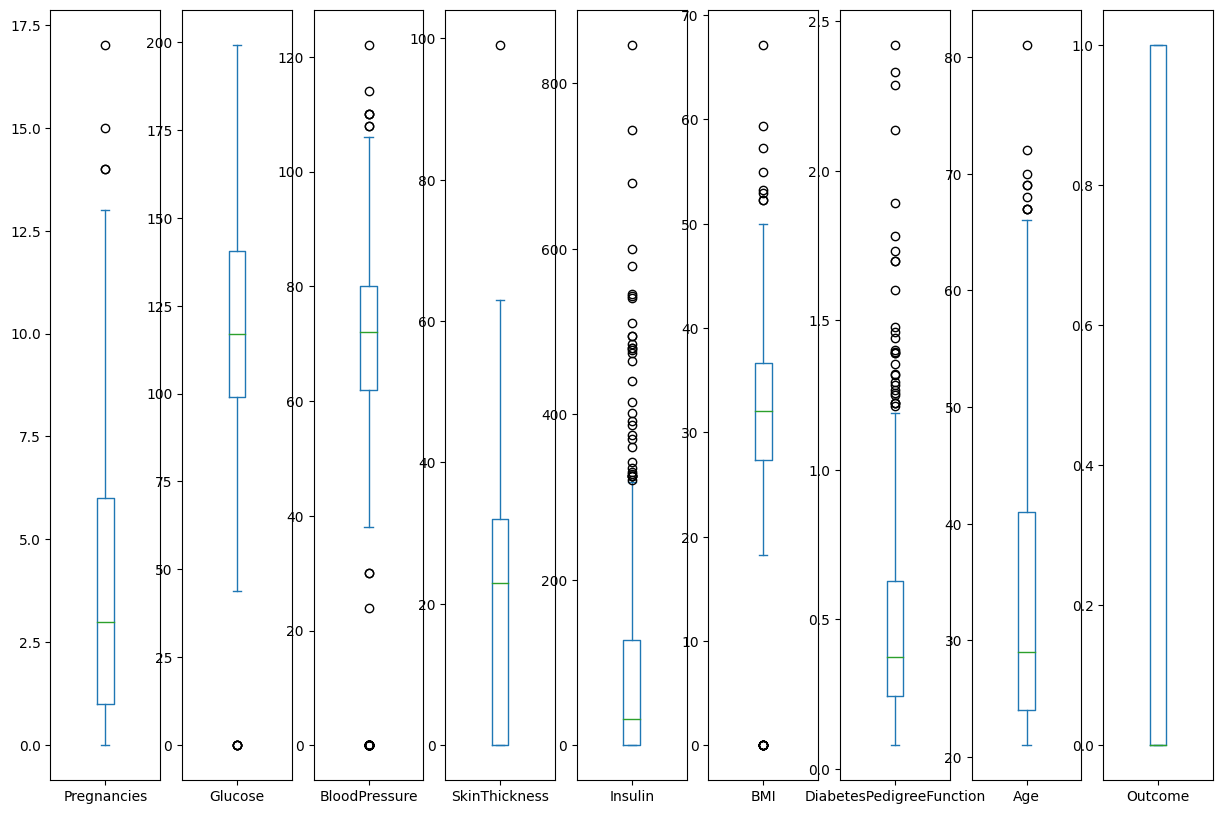

In [6]:
# check whether numerical features have the same scale

df.plot(kind='box', figsize=(15, 10), subplots=True)
plt.show()

### 3d Scatter Plot of the data

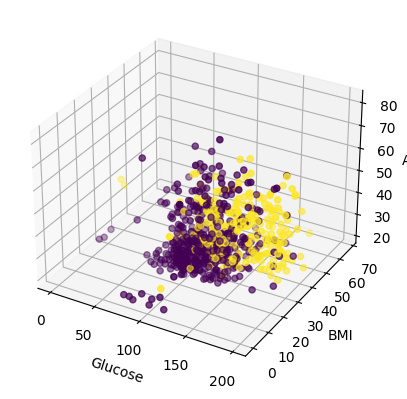

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(df['Glucose'], df['BMI'], df['Age'], c=df['Outcome'])
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')

plt.show()


### Dataset Preprocessing

In [8]:
# the data is shuffled and split into training and testing sets

X = df.drop(columns=['Outcome'])
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Normalize each feature column separately for training and test using MinMax Scaling
numerical_features = X.columns.to_numpy()

scaler = {}
for feature in numerical_features:
    scaler[feature] = [x_train[feature].min(), x_train[feature].max()]
    minVal = scaler[feature][0]
    maxVal = scaler[feature][1]
    x_train[feature] = (x_train[feature] - minVal) / (maxVal - minVal)
    x_test[feature] = (x_test[feature] - minVal) / (maxVal - minVal)

### KNN Model

In [10]:
model = KNN(k=5)
model.fit(x_train.to_numpy(), y_train.to_numpy())

KNN(k=5, type=classification)

### Testing the model

In [11]:
y_pred = model.predict(x_test.to_numpy())

accuracy = model.score(x_test.to_numpy(),y_test.to_numpy())
print("Accuracy:", accuracy)

Accuracy: 0.7272727272727273
